In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

Data Collection and Pre Processing

In [2]:
#Ignore warning messages
warnings.filterwarnings('ignore')

In [3]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('D:\machine learning\dieases_dataset.csv')

In [4]:
# print first 5 rows of the dataset
data.head()
data.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,SwalHealthying Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Status
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,LC
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,LC
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,LC
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,LC
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,LC


In [5]:
# number of rows and columns in the dataset
data.shape

(1000, 25)

In [6]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Id                 1000 non-null   object
 1   Age                        1000 non-null   int64 
 2   Gender                     1000 non-null   int64 
 3   Air Pollution              1000 non-null   int64 
 4   Alcohol use                1000 non-null   int64 
 5   Dust Allergy               1000 non-null   int64 
 6   OccuPational Hazards       1000 non-null   int64 
 7   Genetic Risk               1000 non-null   int64 
 8   chronic Lung Disease       1000 non-null   int64 
 9   Balanced Diet              1000 non-null   int64 
 10  Obesity                    1000 non-null   int64 
 11  Smoking                    1000 non-null   int64 
 12  Passive Smoker             1000 non-null   int64 
 13  Chest Pain                 1000 non-null   int64 
 14  Coughing 

In [7]:
#Encode Object into int64
le = LabelEncoder()

In [8]:
lebeled_data = data
lebeled_data.Status = le.fit_transform(data.Status)
lebeled_data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,SwalHealthying Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Status
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,1
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,1
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,1
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,1
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,1


In [9]:
lebeled_data['Status'].unique()

array([0, 2, 1])

In [10]:
# checking for missing values
lebeled_data.isnull().sum()

Patient Id                   0
Age                          0
Gender                       0
Air Pollution                0
Alcohol use                  0
Dust Allergy                 0
OccuPational Hazards         0
Genetic Risk                 0
chronic Lung Disease         0
Balanced Diet                0
Obesity                      0
Smoking                      0
Passive Smoker               0
Chest Pain                   0
Coughing of Blood            0
Fatigue                      0
Weight Loss                  0
Shortness of Breath          0
Wheezing                     0
SwalHealthying Difficulty    0
Clubbing of Finger Nails     0
Frequent Cold                0
Dry Cough                    0
Snoring                      0
Status                       0
dtype: int64

In [11]:
# statistical measures about the data
lebeled_data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,SwalHealthying Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Status
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.029000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.796739
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [12]:
# find duplicate rows
duplicate_row = lebeled_data[lebeled_data.duplicated()]
print("Duplicates: ", duplicate_row.shape)

Duplicates:  (0, 25)


In [13]:
# delete duplicate rows
cleaned_data = lebeled_data.drop_duplicates()

In [14]:
# verify rows
duplicate_row = lebeled_data[lebeled_data.duplicated()]
print("rows: ", duplicate_row.shape)

rows:  (0, 25)


In [15]:
#Drops Column that is not helpful for the analysis
lebeled_data.drop(['Patient Id'], axis=1, inplace=True)
# lebeled_data.drop(['Obesity'], axis=1, inplace=True)
# lebeled_data.drop(['Balanced Diet'], axis=1, inplace=True)

In [16]:
#Renames the cleaned dataset as the finalDataSet
finalDataset = lebeled_data.reset_index(drop=True)

In [17]:
# checking the distribution of Condition Variable
finalDataset['Status'].value_counts()

1    365
2    332
0    303
Name: Status, dtype: int64

Chart Visualization

<AxesSubplot:>

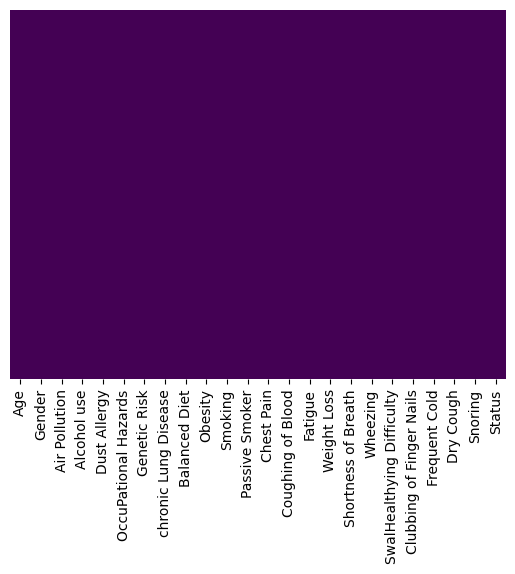

In [18]:
#Visualizing the dataset
sns.heatmap(finalDataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Status', ylabel='count'>

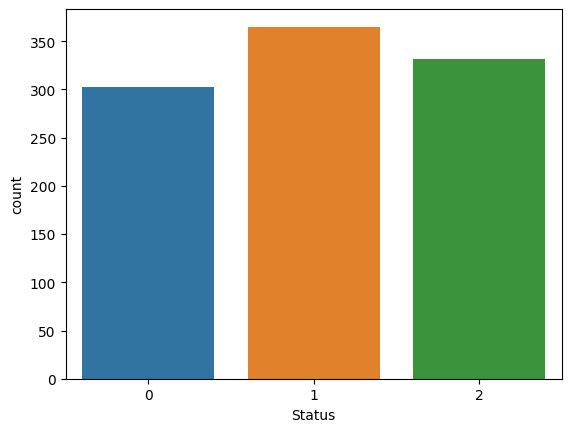

In [19]:
#plotting the outcome
sns.countplot(x='Status',data=finalDataset)

<AxesSubplot:xlabel='Age', ylabel='Density'>

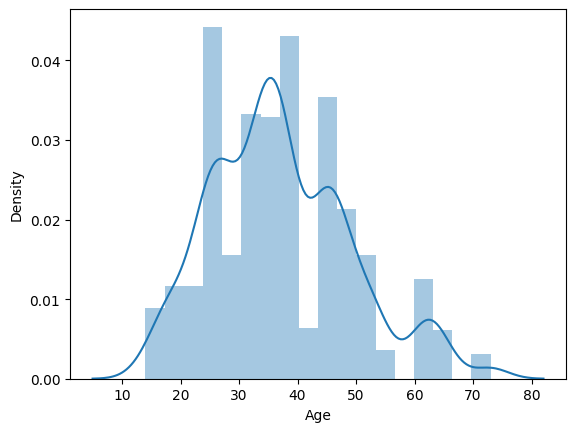

In [20]:
sns.distplot(finalDataset['Age'].dropna(),kde=True)

In [21]:
#Core relation of all the data
finalDataset.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,SwalHealthying Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Status
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.106110
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.078520
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.046186
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.280797
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.453001
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.307947
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.274181
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.171262
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.074576
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.258092


<AxesSubplot:>

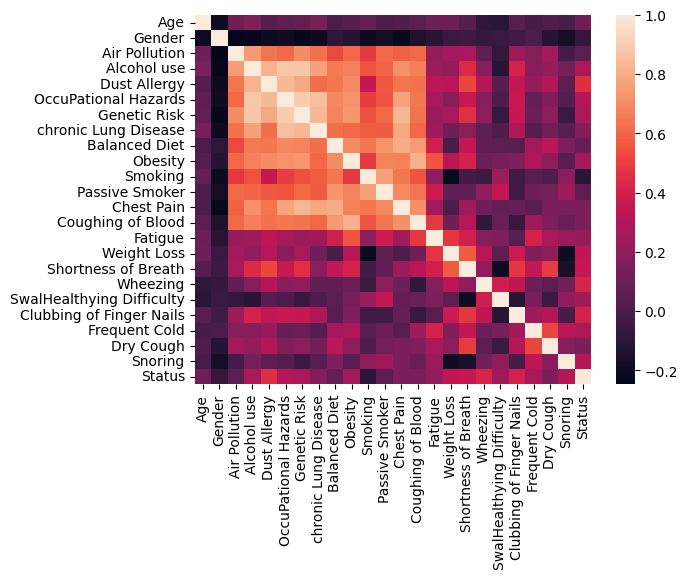

In [22]:
#Heat map for the data set
sns.heatmap(finalDataset.corr())

Splitting the Features and Target

In [23]:
x_features = finalDataset
x_features = finalDataset.drop(columns='Status', axis=1)

In [24]:
X = x_features
Y = finalDataset['Status']

In [25]:
#1st of line of the dataframe
X[0:1]

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,SwalHealthying Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4


Splitting the Data into Training data & Test Data

In [26]:
# Split data 80%-20% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
print ('Training Set: %d, Test Set: %d \n' % (X_train.size, X_test.size))

Training Set: 18400, Test Set: 4600 



In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 23) (800, 23) (200, 23)


In [28]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

Model Training

Logistic Regression

In [29]:
# train a logistic regression model on the training set
model = LogisticRegression(C=0.1, penalty='l2', solver="liblinear").fit(X_train, Y_train)
print (model)

LogisticRegression(C=0.1, solver='liblinear')


Model Evaluation

Accuracy Score

In [30]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

In [31]:
from sklearn. metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.97      1.00      0.99        75
           2       0.91      0.90      0.90        58

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy:', accuracy_score(Y_test, y_pred))
print("Overall Precision:",precision_score(Y_test, y_pred, pos_label='positive',average='micro'))
print("Overall Recall:",recall_score(Y_test, y_pred, pos_label='positive',average='micro'))

Accuracy: 0.945
Overall Precision: 0.945
Overall Recall: 0.945


In [33]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(Y_test, y_pred)
print(mcm)

[[62  0  5]
 [ 0 75  0]
 [ 4  2 52]]


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.945


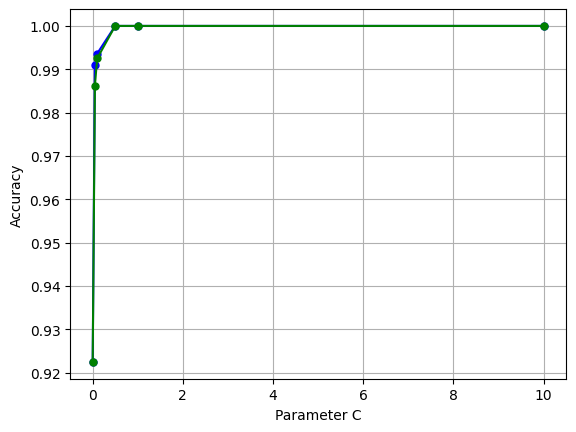

In [35]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=Y_train,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)

# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Building a Predictive System

In [36]:

input_data = (39,2,4,5,6,6,5,4,6,6,6,6,6,6,5,3,2,4,3,1,7,5,6)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# # reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0]== 0):
  print('The Person is Healthy')
elif (prediction[0]== 1):
  print('The Person Have Lung Cancer')
else:
  print('The Person Have Tuberculosis')



[2]
The Person Have Tuberculosis


# Pickling the model

In [37]:
# Make pickle file of our model
pickle.dump(model, open("final_model.pkl", "wb"))

In [38]:
load_model = pickle.load(open("final_model.pkl", "rb"))

In [39]:
accuracy = load_model.score(X_test,Y_test)

In [40]:
print("Accuracy : ",accuracy)

Accuracy :  0.945
